In [1]:
api_token = {"username":"bananaiselite","key":"9b4c7da58d4f22ab05a45350b5c6c27a"}
import json
import zipfile
import os
 
if not os.path.exists("/root/.kaggle"):
    os.makedirs("/root/.kaggle")
 
with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)
!chmod 600 /content/kaggle/kaggle.json
 
if not os.path.exists("/content"):
    os.makedirs("/content")
os.chdir("/content")
!kaggle datasets download -d chetankv/dogs-cats-images --force
 
!ls /content

chmod: cannot access '/content/kaggle/kaggle.json': No such file or directory
 98% 425M/435M [00:05<00:00, 104MB/s]
100% 435M/435M [00:05<00:00, 88.5MB/s]
dogs-cats-images.zip  sample_data


In [2]:
with zipfile.ZipFile('/content/dogs-cats-images.zip', mode='r') as z:
    z.extractall()

In [3]:
import os
import shutil
path_cat =  '/content/dataset/test_set/cats/'
path_dog =  '/content/dataset/test_set/dogs/'

for i in os.listdir(path_cat):
  shutil.move(path_cat+i, '/content/test_data')

for i in os.listdir(path_dog):
  shutil.move(path_dog+i, '/content/test_data')

In [4]:
import os
import shutil
path_cat =  '/content/dataset/training_set/cats/'
path_dog =  '/content/dataset/training_set/dogs/'

for i in os.listdir(path_cat):
  shutil.move(path_cat+i, '/content/train_data')

for i in os.listdir(path_dog):
  shutil.move(path_dog+i, '/content/train_data')

In [5]:
import torch.utils.data as data
from PIL import Image
import numpy as np
import torch
from torch import nn
from torch import optim
import torchvision.transforms as transforms
import torchvision.models as models
import numpy as np

In [6]:
data_transform = transforms.Compose([transforms.Resize(256), 
                  transforms.ColorJitter(),
                  transforms.RandomCrop(224), 
                  transforms.RandomHorizontalFlip(), 
                  transforms.Resize(128),
                  transforms.ToTensor()])

In [42]:
class Dogs_vs_Cats(data.Dataset):

  def __init__(self, mode, transform):
     self.img_label = []
     self.img_file = []
     self.data_size = 0
     self.mode = mode
     self.transform = transform


     if self.mode == 'train':
       train_dir = '/content/train_data/'
       train_files = os.listdir(train_dir)

       for pic in train_files:
         self.img_file.append(train_dir+pic)        
         self.data_size += 1        
         label = pic.split('.')[0]
         if label == 'cat':
           self.img_label.append(0)
         elif label == 'dog':
           self.img_label.append(1)



     elif self.mode == 'test':
        test_dir = '/content/test_data/'
        test_files = os.listdir(test_dir)
        for pic in test_files:
          self.img_file.append(test_dir + pic)
          self.data_size += 1

  def __getitem__(self, item):
      
        if self.mode =='train':
          img = Image.open(self.img_file[item]) 
          label = self.img_label[item]
          return self.transform(img), torch.LongTensor([label]) 

        elif self.mode == 'test':
          img = Image.open(self.img_file[item])  
          return self.transform(img)

  def __len__(self):
    return self.data_size

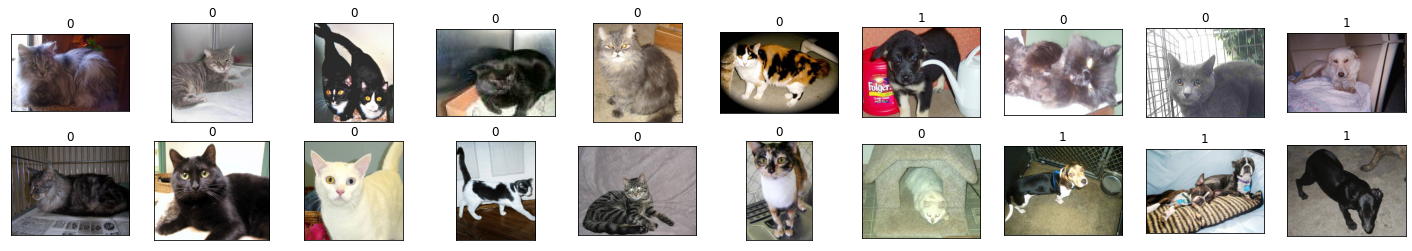

In [8]:
import matplotlib.pyplot as plt

datafile = Dogs_vs_Cats('train',data_transform)

pic = datafile.img_file
label = datafile.img_label

fig = plt.figure(figsize=(25, 4))

for i in np.arange(20):
    ax = fig.add_subplot(2, 20/2, i+1, xticks=[], yticks=[])
    plt.imshow(Image.open(pic[i]))
    ax.set_title(label[i])

In [104]:
batch_size = 16
dataloader = data.DataLoader(datafile, batch_size=batch_size, shuffle= True, num_workers=10)

In [105]:
model = models.vgg16(pretrained=True)
print(model)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [106]:
model.classifier[6] = nn.Linear(in_features=4096, out_features=2, bias=True)
model.named_parameters

<bound method Module.named_parameters of VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kerne

In [107]:
params_to_update = []

update_params_name = ['classifier.6.weight', 'classifier.6.bias']

for name, param in model.named_parameters():
    if name in update_params_name:
        param.requires_grad = True
        params_to_update.append(param)
        print(name)
    else:
        param.requires_grad = False

classifier.6.weight
classifier.6.bias


In [108]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

Epoch: 1/5, File:100/500
Epoch: 1/5, File:200/500
Epoch: 1/5, File:300/500
Epoch: 1/5, File:400/500
Epoch: 1/5, File:500/500
Training Loss of Epoch 1 : 0.2559703290462494
Epoch: 2/5, File:100/500
Epoch: 2/5, File:200/500
Epoch: 2/5, File:300/500
Epoch: 2/5, File:400/500
Epoch: 2/5, File:500/500
Training Loss of Epoch 2 : 0.2585296928882599
Epoch: 3/5, File:100/500
Epoch: 3/5, File:200/500
Epoch: 3/5, File:300/500
Epoch: 3/5, File:400/500
Epoch: 3/5, File:500/500
Training Loss of Epoch 3 : 0.24483400583267212
Epoch: 4/5, File:100/500
Epoch: 4/5, File:200/500
Epoch: 4/5, File:300/500
Epoch: 4/5, File:400/500
Epoch: 4/5, File:500/500
Training Loss of Epoch 4 : 0.2856824994087219
Epoch: 5/5, File:100/500
Epoch: 5/5, File:200/500
Epoch: 5/5, File:300/500
Epoch: 5/5, File:400/500
Epoch: 5/5, File:500/500
Training Loss of Epoch 5 : 0.2586528956890106


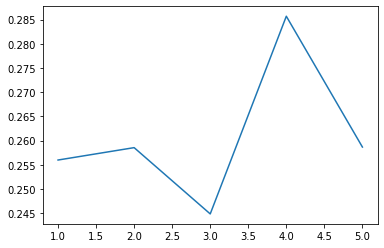

In [109]:
epochs =5
model.train() 
optimizer = optim.Adam(params_to_update,lr=0.001)
criterion = nn.CrossEntropyLoss()


def train(model, trainloader, criterion, optimizer, epochs = 5):
    train_loss = []
    model = model.to(device)
    model.train()
    for i in range(epochs):
        epoch_loss =0
        cnt = 0
        for images, labels in trainloader:
            img, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            output = model(img)
            loss = criterion(output, labels.squeeze())
            epoch_loss += loss
            loss.backward()
            optimizer.step()
            cnt += 1
            if  cnt % 100 ==0:
              print(f'Epoch: {i+1}/{epochs}, File:{cnt}/{len(trainloader)}')

        print(f'Training Loss of Epoch {i+1} : {epoch_loss / len(trainloader)}')
        train_loss.append(epoch_loss) 
        
    plt.plot([*range(1,6)], list(map(lambda x: x/len(trainloader), train_loss)))
    plt.show()
train(model,dataloader, criterion, optimizer, epochs)

**Test file**

In [110]:
test_transform = transforms.Compose([
    transforms.Resize((128,128)),
    transforms.ToTensor()
])
datafile_test = Dogs_vs_Cats('test',test_transform)
#(16, 3, 128, 128)
dataloader_test = data.DataLoader(datafile_test, batch_size=batch_size, num_workers=10)

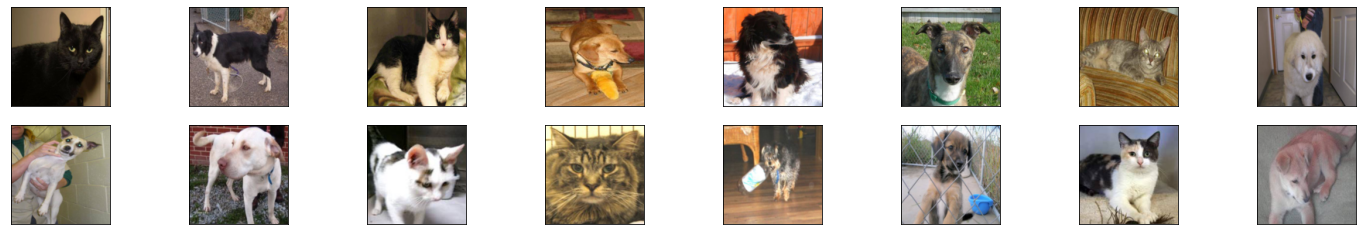

In [115]:
img = iter(dataloader_test).next()

fig = plt.figure(figsize=(25, 4))

for i in np.arange(16):
    ax = fig.add_subplot(2, 16/2, i+1, xticks=[], yticks=[])
    plt.imshow(np.transpose(img[i],(1,2,0)))

In [133]:
model.eval()
y_prd = []
for img in dataloader_test:
  with torch.no_grad():
    img = img.to(device) 
    output = model(img)
    pred = torch.argmax(output, dim=1)
    y_prd.append([p.item() for p in pred])

<Figure size 1800x288 with 0 Axes>

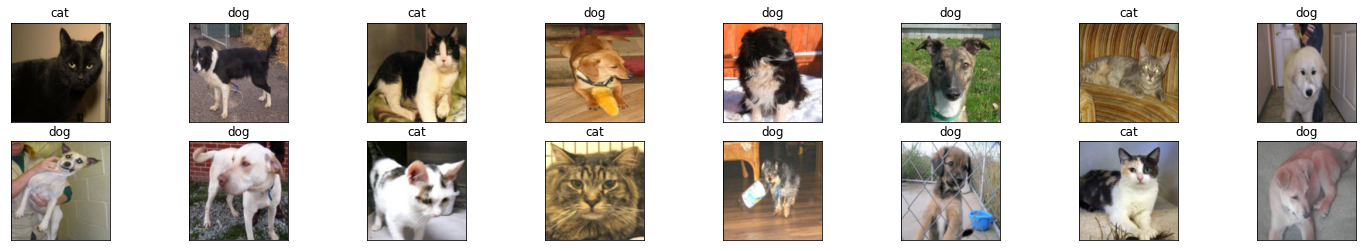

In [141]:
img = iter(dataloader_test).next()

fig = plt.figure(figsize=(25, 4))
y_prd[0]
trans_label = {0:'cat', 1: 'dog'}

for i in np.arange(16):
    ax = fig.add_subplot(2, 16/2, i+1, xticks=[], yticks=[])
    ax.title.set_text(trans_label[y_prd[0][i]])
    plt.imshow(np.transpose(img[i],(1,2,0)))